In [91]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import multiprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/ci3.csv')

In [52]:
cores = multiprocessing.cpu_count() - 1

In [3]:
df.head()

,Region,Duration,Cover_Type,Age,Cover_Name,Excess,Medical_Expenses,Cancellation_Fee,Luggage,Price,Company
0,Africa,1,Medium,21,Woolworths Travel Insurance Basic $100 Excess,100,Unlimited,5000,5000,20.47,Woolworth
1,Africa,1,Basic,21,Woolworths Travel Insurance Saver $200 Excess,200,Unlimited,0,2000,17.04,Woolworth
2,Africa,1,Comprehensive,21,Woolworths Travel Insurance Comprehensive $100...,100,Unlimited,20000,10000,31.01,Woolworth
3,Africa,1,Medium,21,Woolworths Travel Insurance Basic $200 Excess,200,Unlimited,5000,5000,18.42,Woolworth
4,Africa,1,Comprehensive,21,Woolworths Travel Insurance Comprehensive $0 E...,0,Unlimited,20000,10000,38.76,Woolworth


In [4]:
df.shape

(1657722, 11)

In [5]:
df['Region'].value_counts()

United Kingdom    201823
Africa            198658
Bali              195339
Middle East       195209
Worldwide         193239
Asia              190991
Europe            190978
Pacific           189008
Australia         102477
Name: Region, dtype: int64

In [6]:
df['Cover_Type'].value_counts()

Comprehensive    683099
Medium           545757
Basic            428866
Name: Cover_Type, dtype: int64

In [7]:
df['Age'].value_counts()

21    278339
39    278321
29    278239
59    271842
49    271829
69    204858
83     42469
95     31825
Name: Age, dtype: int64

In [8]:
df['Excess'].value_counts()

200     706394
100     589630
0       199214
150      95100
250      53267
50       11680
2000      1563
125        874
Name: Excess, dtype: int64

In [9]:
df['Medical_Expenses'].value_counts()

Unlimited    1398358
25000000       72666
12500000       53267
5000000        36117
0              23084
30000          16362
40000          16332
50000           2920
200000          1825
10000            365
Name: Medical_Expenses, dtype: int64

In [10]:
df['Cancellation_Fee'].value_counts()

Unlimited    438185
0            250528
5000         240671
15000        158267
10000        117362
20000        110684
12500         88475
50000         36850
2500          32307
25000         21034
7500           8785
3000           5840
1000           5840
30000          5495
40000          5486
2000           3332
1500           2077
Name: Cancellation_Fee, dtype: int64

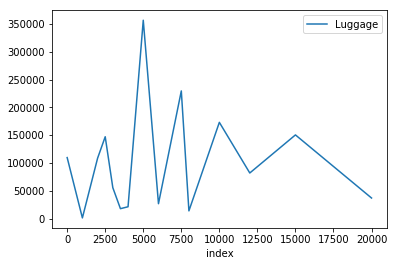

In [11]:
lug = df['Luggage'].value_counts().to_frame().reset_index()
lug = lug[lug['index'] != 'Optional (up to $2000)']
lug['index'] = lug['index'].apply(int)
lug.sort_values(['index']).plot('index', 'Luggage')

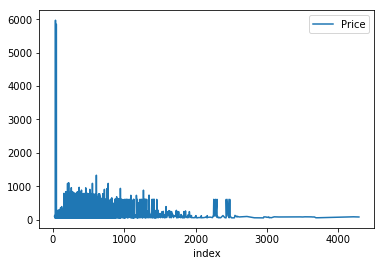

In [12]:
prices = df['Price'].value_counts().to_frame().reset_index()
prices = prices[prices['Price'] > 50]
prices.sort_values(['index']).plot('index', 'Price')

In [13]:
df['Company'].value_counts()

Budget Direct             199244
Travel Insurance Saver    197198
Woolworth                 177390
1Cover                    139417
Fast Cover                130815
Go Insurance              113158
American Express           76559
Kango Cover                74123
No Worries Insurance       73700
Travel Insuranz            66580
Webjet                     58944
Virgin Money               58935
Zoom Travel Insurance      54627
Tick Travel Insurance      45991
Downunder Insurance        44240
Insure and Go              41000
Columbus Direct            36690
Priceline Protect          27546
Easy Travel Insurance      26616
Ski Insurance              14949
Name: Company, dtype: int64

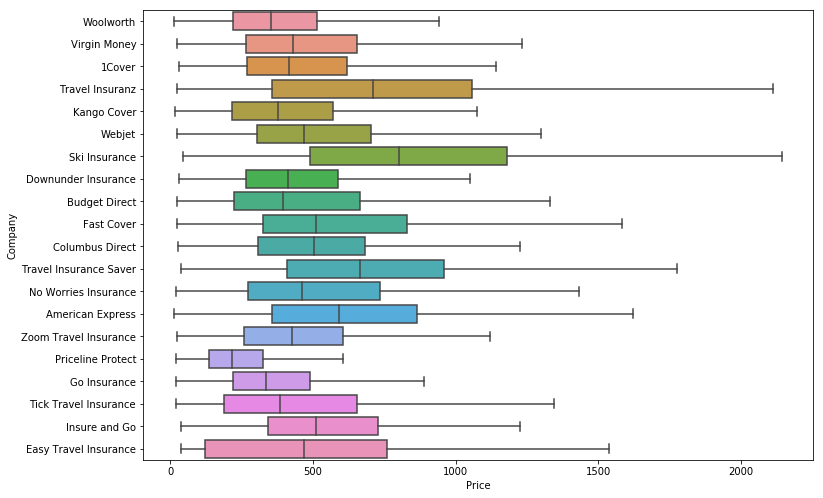

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8.27)
sb.boxplot(x="Price", y="Company", data=df, ax=ax, showfliers=False)

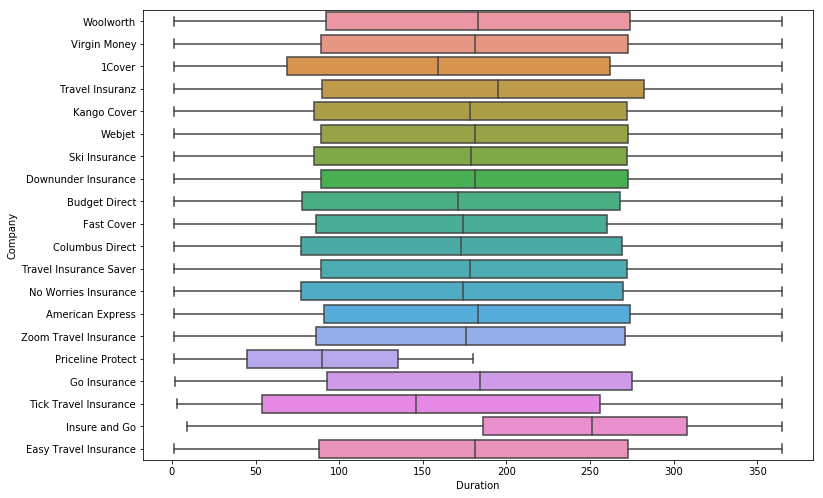

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8.27)
sb.boxplot(x="Duration", y="Company", data=df, ax=ax, showfliers=False)

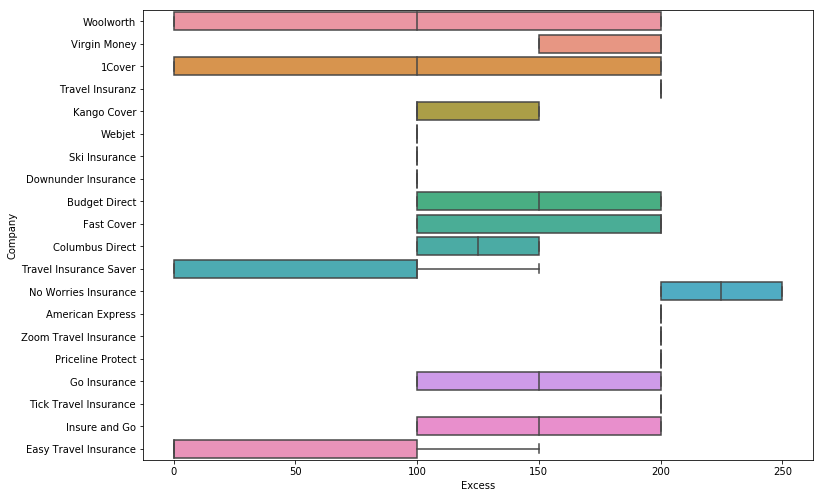

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8.27)
sb.boxplot(x="Excess", y="Company", data=df, ax=ax, showfliers=False)

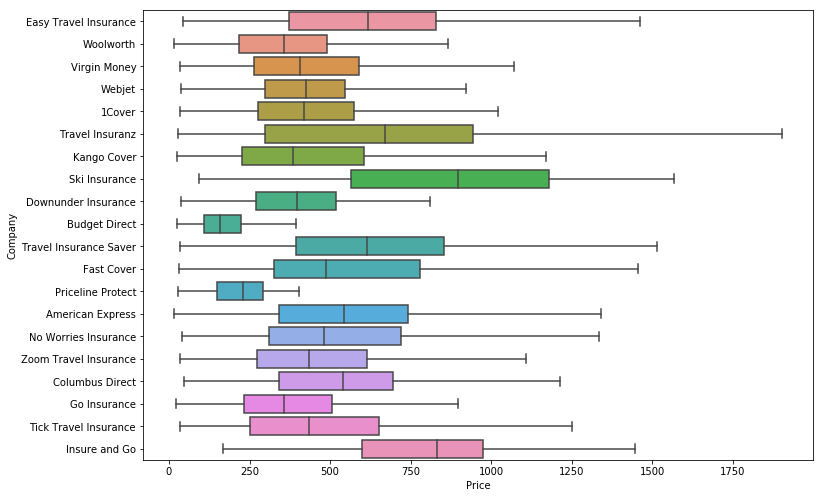

In [17]:
df_uk = df[df['Region'] == 'United Kingdom']
fig, ax = plt.subplots()
fig.set_size_inches(12, 8.27)
sb.boxplot(x="Price", y="Company", data=df_uk, ax=ax, showfliers=False)

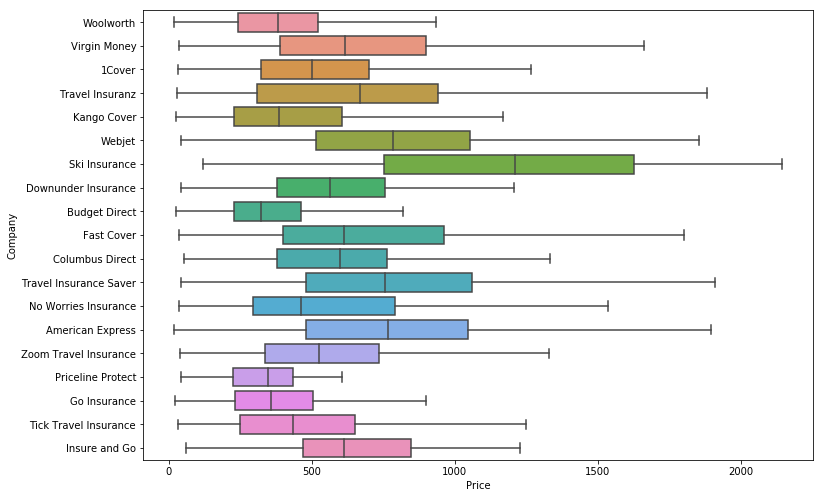

In [18]:
df_af = df[df['Region'] == 'Africa']
fig, ax = plt.subplots()
fig.set_size_inches(12, 8.27)
sb.boxplot(x="Price", y="Company", data=df_af, ax=ax, showfliers=False)

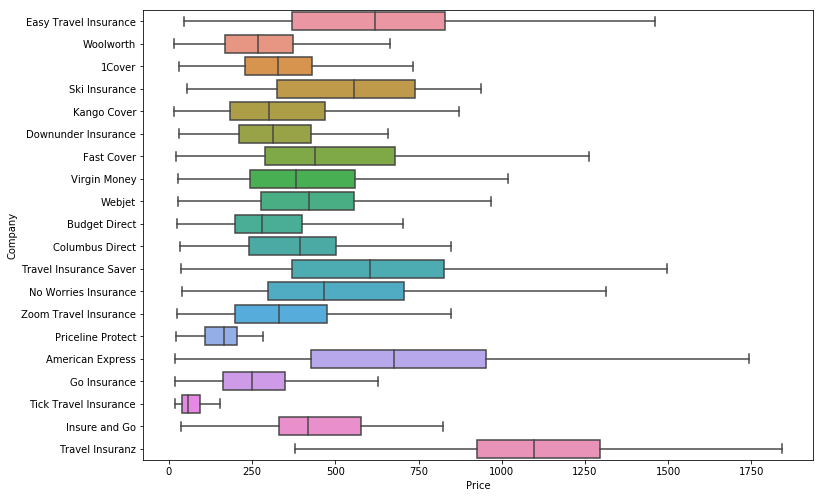

In [19]:
df_ba = df[df['Region'] == 'Bali']
fig, ax = plt.subplots()
fig.set_size_inches(12, 8.27)
sb.boxplot(x="Price", y="Company", data=df_ba, ax=ax, showfliers=False)

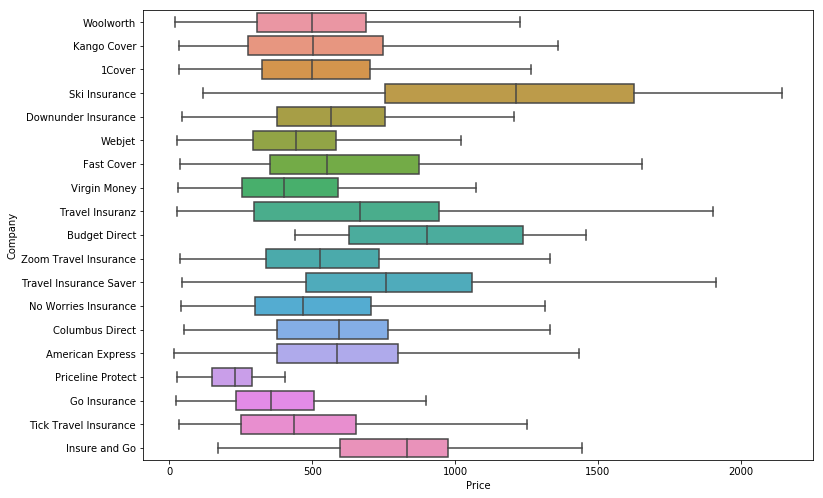

In [20]:
df_me = df[df['Region'] == 'Middle East']
fig, ax = plt.subplots()
fig.set_size_inches(12, 8.27)
sb.boxplot(x="Price", y="Company", data=df_me, ax=ax, showfliers=False)

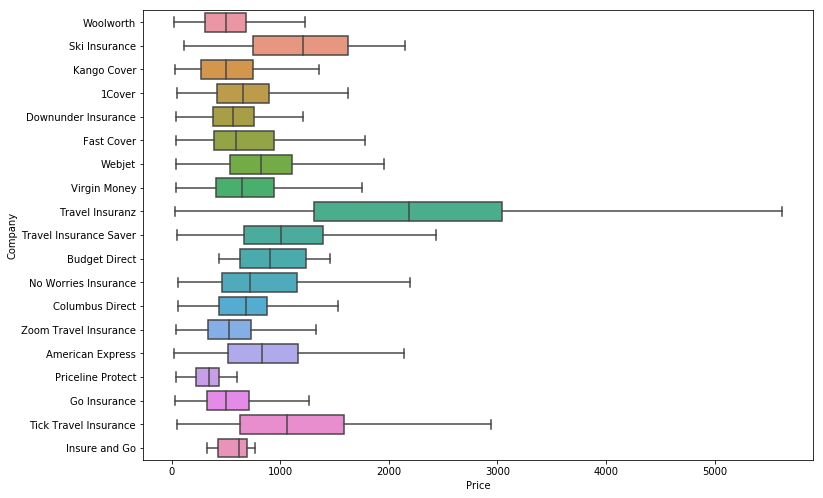

In [21]:
df_w = df[df['Region'] == 'Worldwide']
fig, ax = plt.subplots()
fig.set_size_inches(12, 8.27)
sb.boxplot(x="Price", y="Company", data=df_w, ax=ax, showfliers=False)

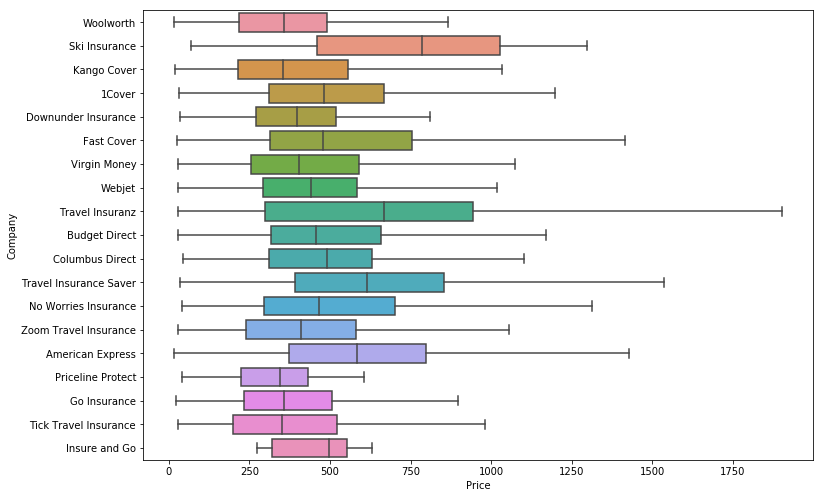

In [22]:
df_a = df[df['Region'] == 'Asia']
fig, ax = plt.subplots()
fig.set_size_inches(12, 8.27)
sb.boxplot(x="Price", y="Company", data=df_a, ax=ax, showfliers=False)

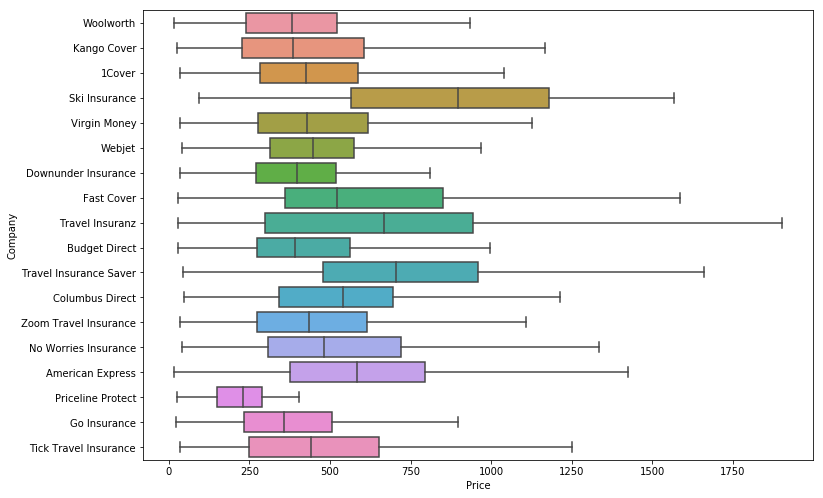

In [23]:
df_e = df[df['Region'] == 'Europe']
fig, ax = plt.subplots()
fig.set_size_inches(12, 8.27)
sb.boxplot(x="Price", y="Company", data=df_e, ax=ax, showfliers=False)

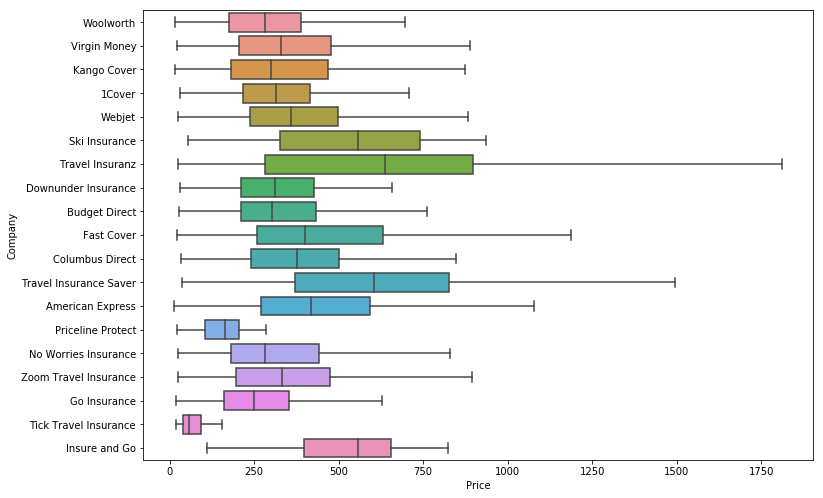

In [24]:
df_p = df[df['Region'] == 'Pacific']
fig, ax = plt.subplots()
fig.set_size_inches(12, 8.27)
sb.boxplot(x="Price", y="Company", data=df_p, ax=ax, showfliers=False)

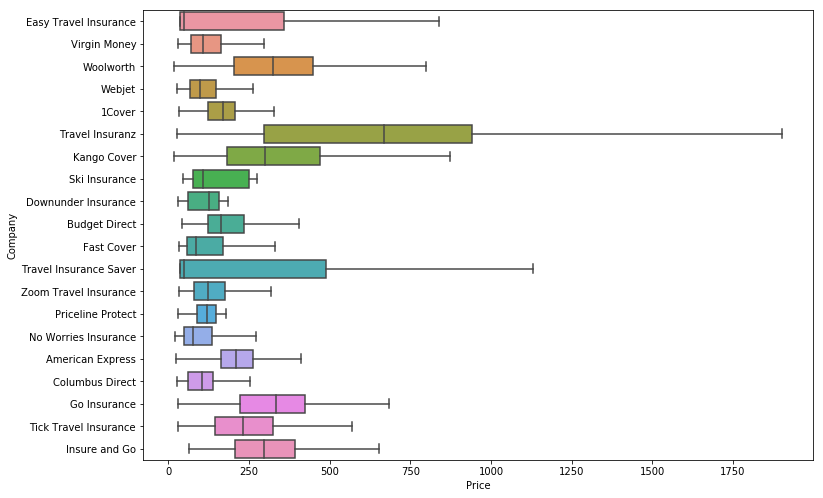

In [25]:
df_aus = df[df['Region'] == 'Australia']
fig, ax = plt.subplots()
fig.set_size_inches(12, 8.27)
sb.boxplot(x="Price", y="Company", data=df_aus, ax=ax, showfliers=False)

In [26]:
df_aus_ti = df_aus[df_aus['Company'] == 'Travel Insuranz']
df_aus_ti.shape

(8256, 11)

In [27]:
df_aus_ti['Price'].describe()

count    8256.000000
mean      686.931265
std       453.108922
min        27.950000
25%       297.380000
50%       668.950000
75%       942.440000
max      2456.120000
Name: Price, dtype: float64

In [28]:
df_aus.shape

(102477, 11)

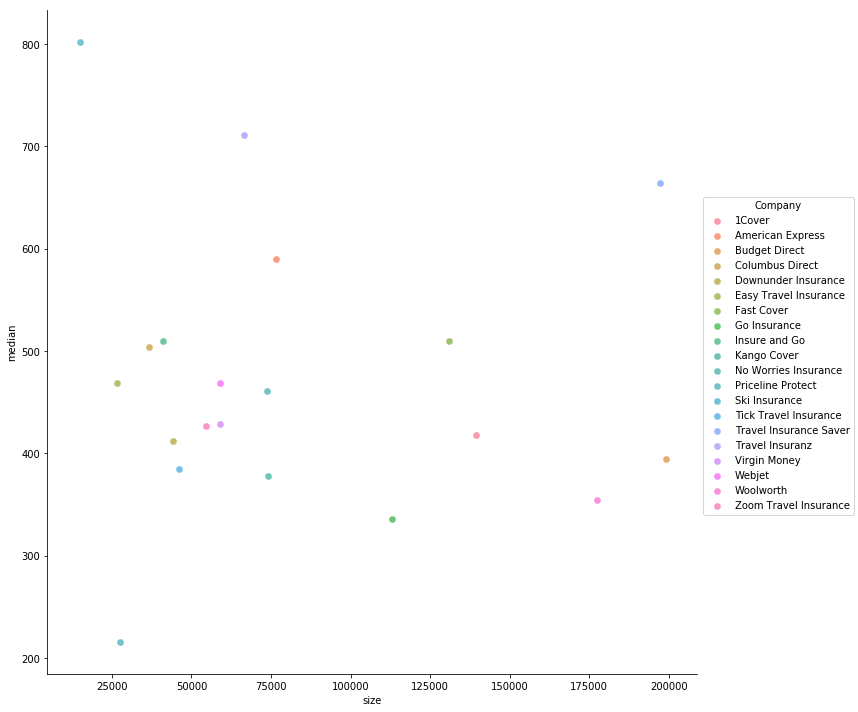

In [29]:
all_comp = df.groupby('Company').agg({'Price':[np.mean, np.median, np.size]}).reset_index()
all_comp.columns = ['Company', 'mean', 'median', 'size']
g = sb.FacetGrid(all_comp, hue="Company", size=10)
g.map(plt.scatter, "size", "median", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

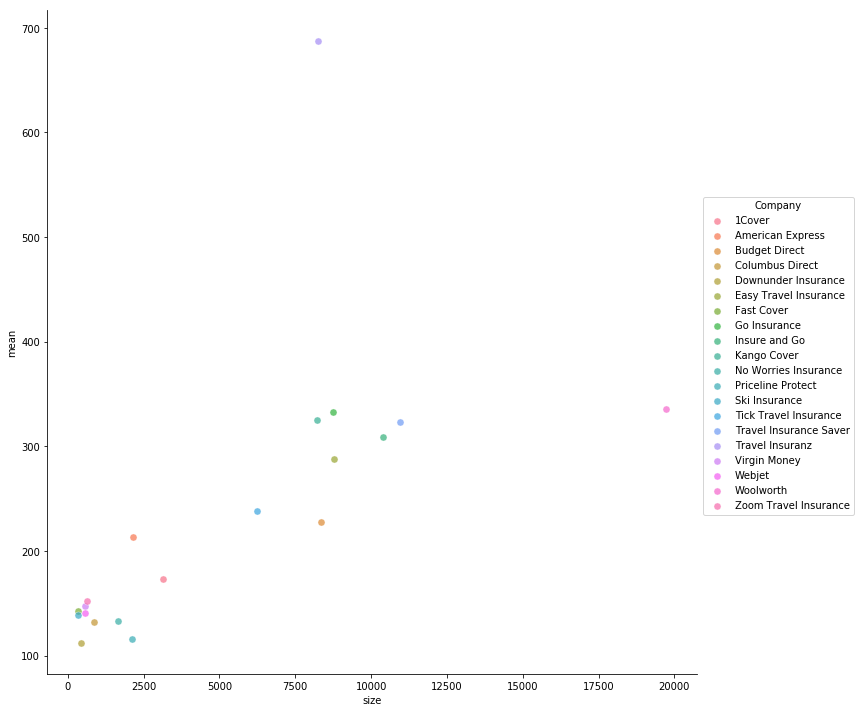

In [30]:
aus_comp = df_aus.groupby('Company').agg({'Price':[np.mean, np.median, np.size]}).reset_index()
aus_comp.columns = ['Company', 'mean', 'median', 'size']
g = sb.FacetGrid(aus_comp, hue="Company", size=10)
g.map(plt.scatter, "size", "mean", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

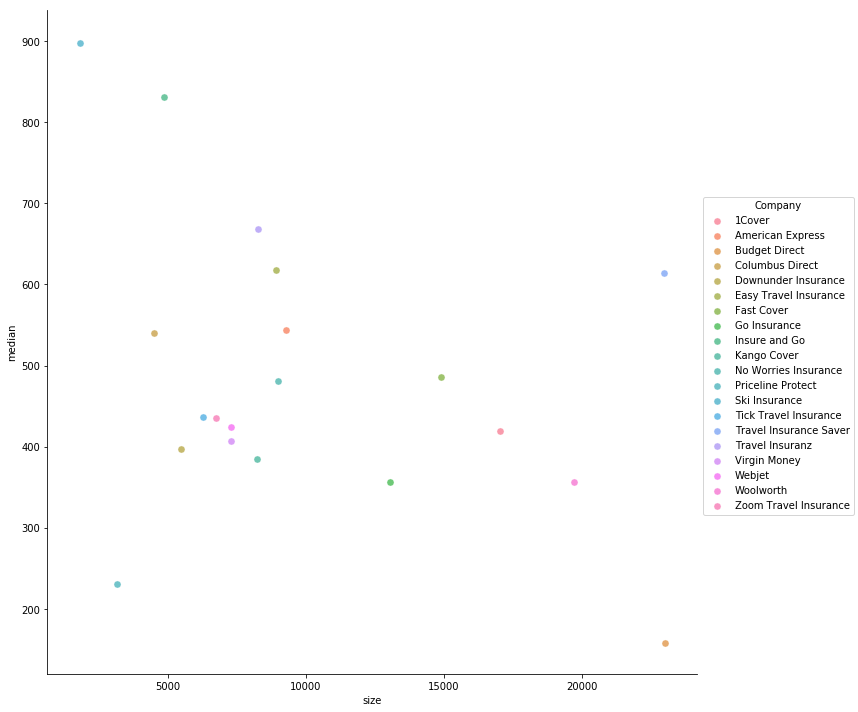

In [31]:
uk_comp = df_uk.groupby('Company').agg({'Price':[np.mean, np.median, np.size]}).reset_index()
uk_comp.columns = ['Company', 'mean', 'median', 'size']
g = sb.FacetGrid(uk_comp, hue="Company", size=10)
g.map(plt.scatter, "size", "median", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

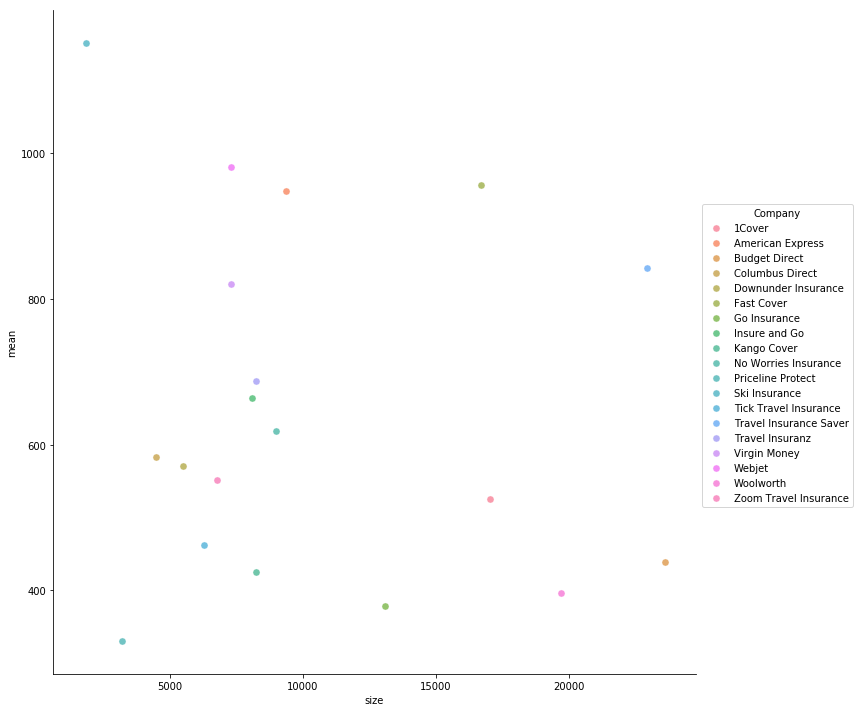

In [32]:
af_comp = df_af.groupby('Company').agg({'Price':[np.mean, np.median, np.size]}).reset_index()
af_comp.columns = ['Company', 'mean', 'median', 'size']
g = sb.FacetGrid(af_comp, hue="Company", size=10)
g.map(plt.scatter, "size", "mean", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

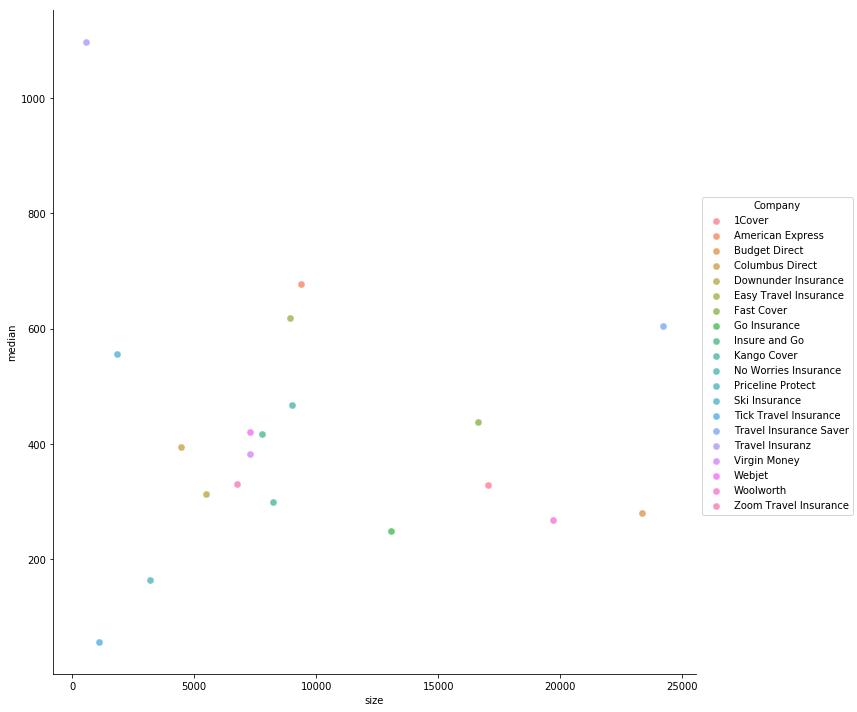

In [33]:
bali_comp = df_ba.groupby('Company').agg({'Price':[np.mean, np.median, np.size]}).reset_index()
bali_comp.columns = ['Company', 'mean', 'median', 'size']
g = sb.FacetGrid(bali_comp, hue="Company", size=10)
g.map(plt.scatter, "size", "median", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

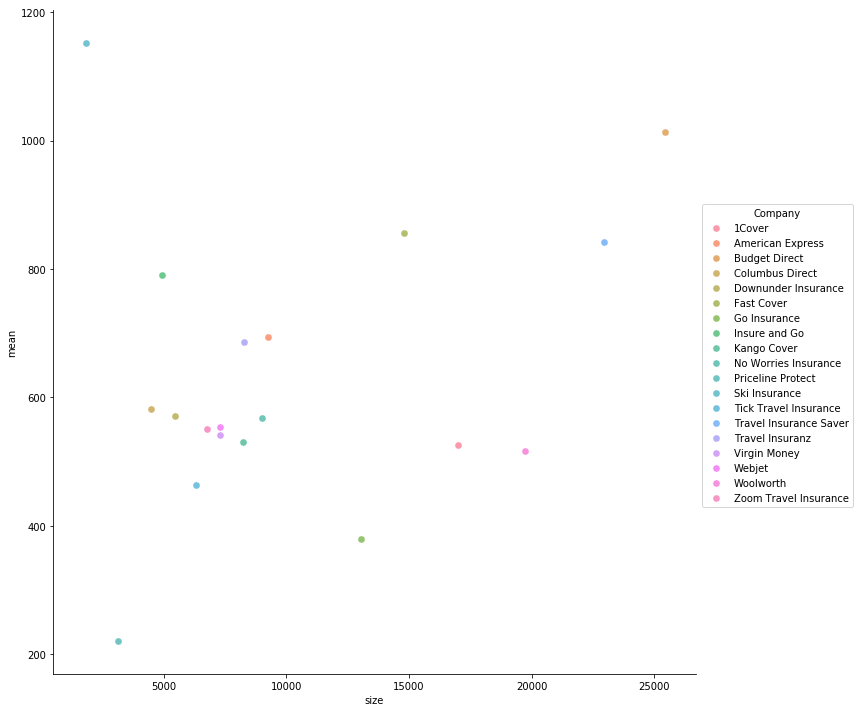

In [34]:
me_comp = df_me.groupby('Company').agg({'Price':[np.mean, np.median, np.size]}).reset_index()
me_comp.columns = ['Company', 'mean', 'median', 'size']
g = sb.FacetGrid(me_comp, hue="Company", size=10)
g.map(plt.scatter, "size", "mean", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

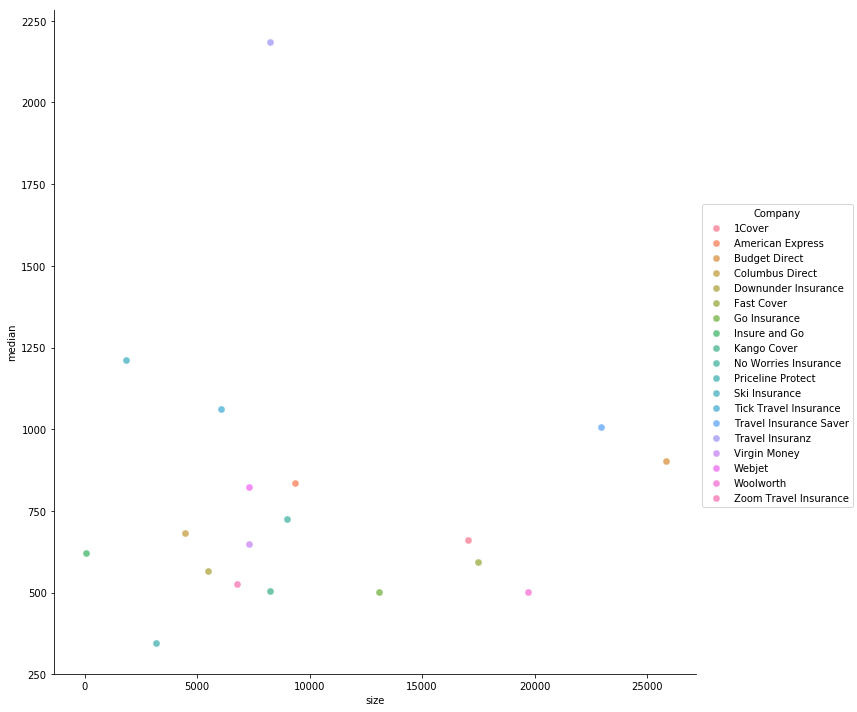

In [35]:
w_comp = df_w.groupby('Company').agg({'Price':[np.mean, np.median, np.size]}).reset_index()
w_comp.columns = ['Company', 'mean', 'median', 'size']
g = sb.FacetGrid(w_comp, hue="Company", size=10)
g.map(plt.scatter, "size", "median", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

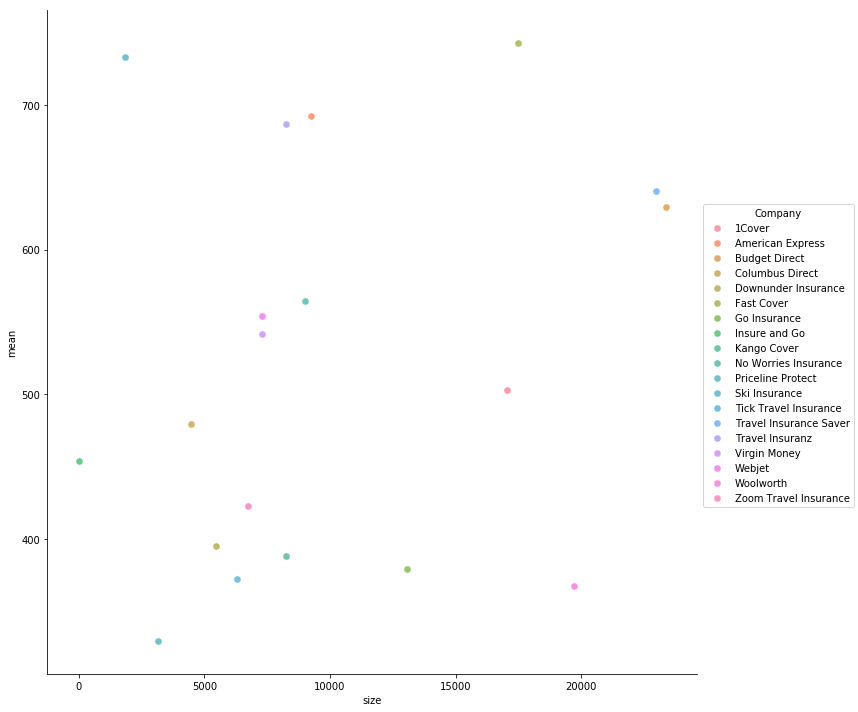

In [36]:
a_comp = df_a.groupby('Company').agg({'Price':[np.mean, np.median, np.size]}).reset_index()
a_comp.columns = ['Company', 'mean', 'median', 'size']
g = sb.FacetGrid(a_comp, hue="Company", size=10)
g.map(plt.scatter, "size", "mean", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

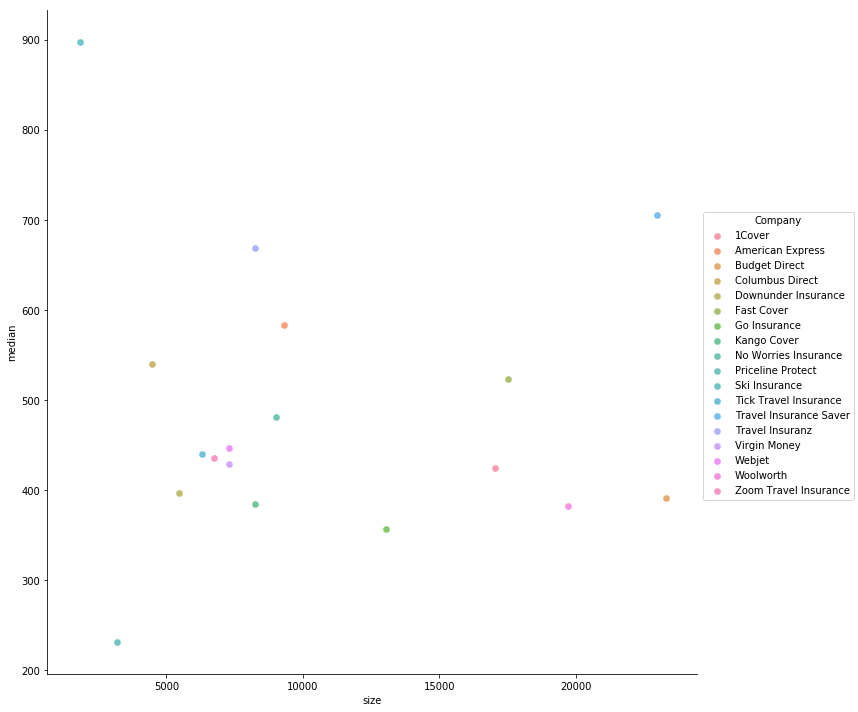

In [37]:
e_comp = df_e.groupby('Company').agg({'Price':[np.mean, np.median, np.size]}).reset_index()
e_comp.columns = ['Company', 'mean', 'median', 'size']
g = sb.FacetGrid(e_comp, hue="Company", size=10)
g.map(plt.scatter, "size", "median", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

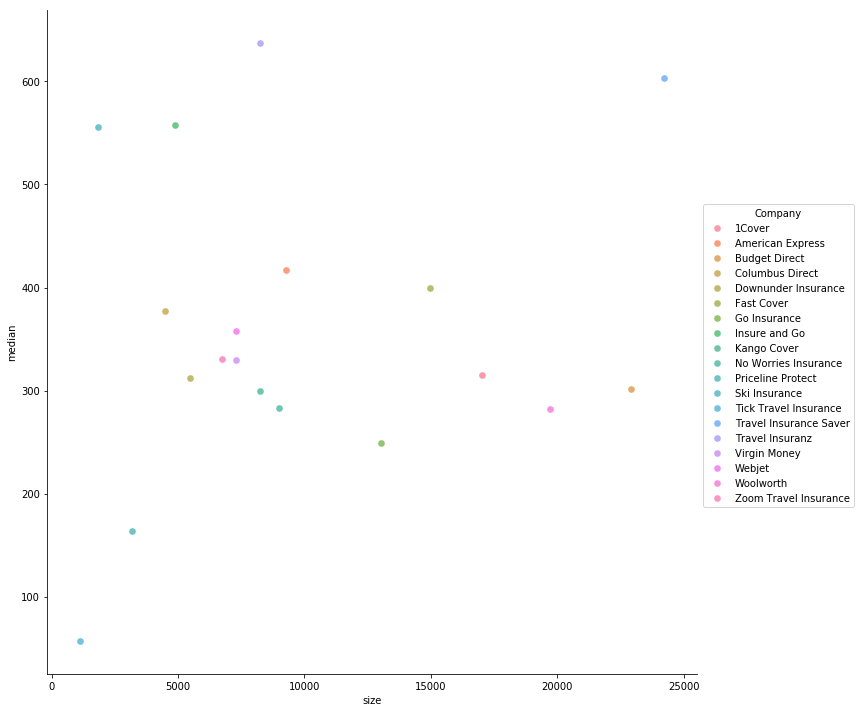

In [38]:
p_comp = df_p.groupby('Company').agg({'Price':[np.mean, np.median, np.size]}).reset_index()
p_comp.columns = ['Company', 'mean', 'median', 'size']
g = sb.FacetGrid(p_comp, hue="Company", size=10)
g.map(plt.scatter, "size", "median", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

## Filter by cover type

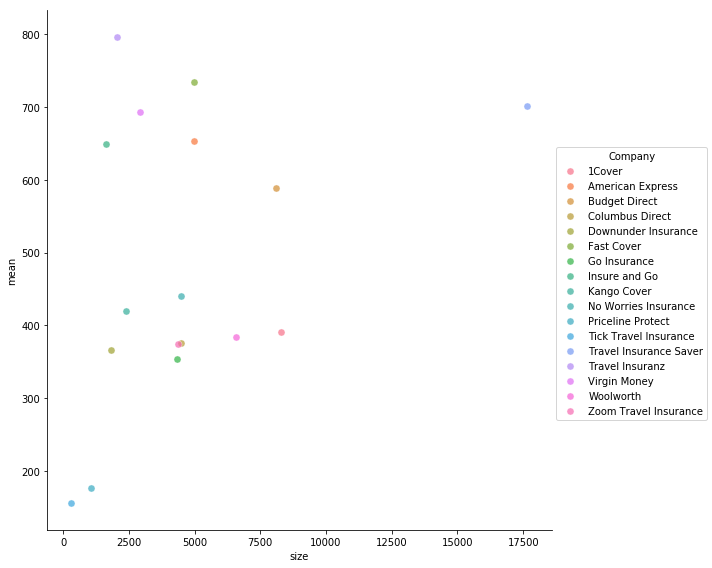

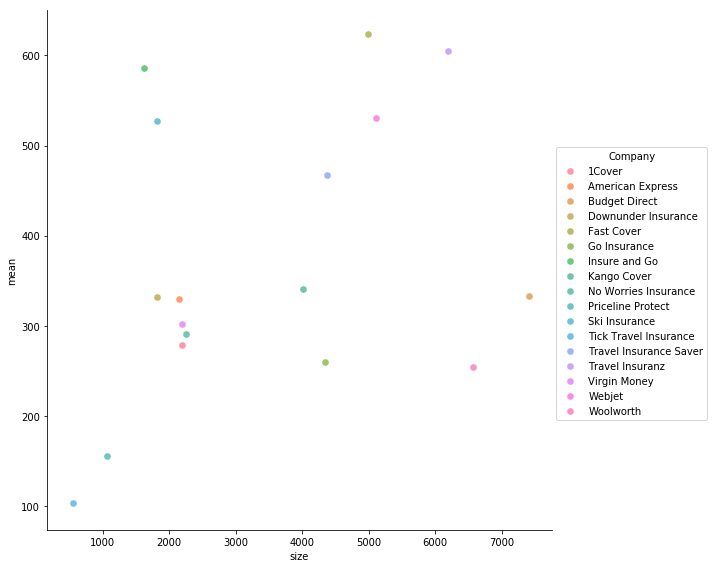

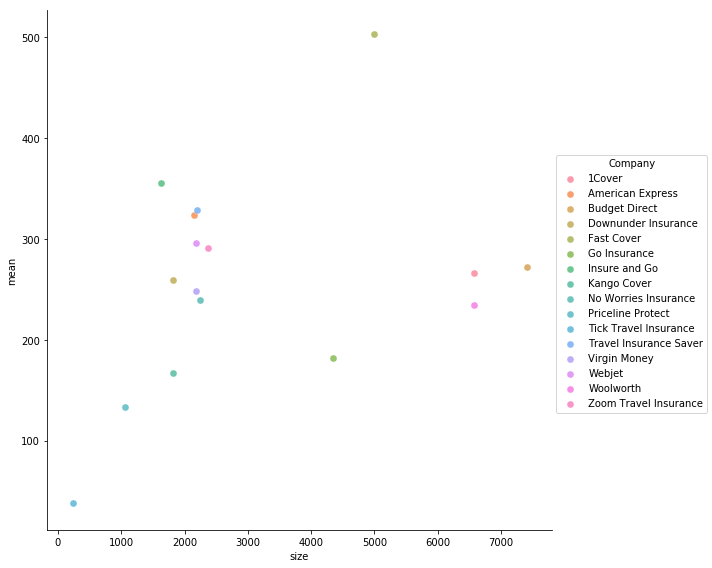

In [39]:
cover_types = ['Comprehensive', 'Medium', 'Basic']

for ct in cover_types:
    dft = df_p[df_p['Cover_Type'] == ct]
    all_comp = dft.groupby('Company').agg({'Price':[np.mean, np.median, np.size]}).reset_index()
    all_comp.columns = ['Company', 'mean', 'median', 'size']
    g = sb.FacetGrid(all_comp, hue="Company", size=8)
    g.map(plt.scatter, "size", "mean", s=50, alpha=.7, linewidth=.5, edgecolor="white")
    g.add_legend();

There is no clear separation of companies in most of charts. The one on few exceptions is median price for australian market. Lets try to make our clusterization based on it.

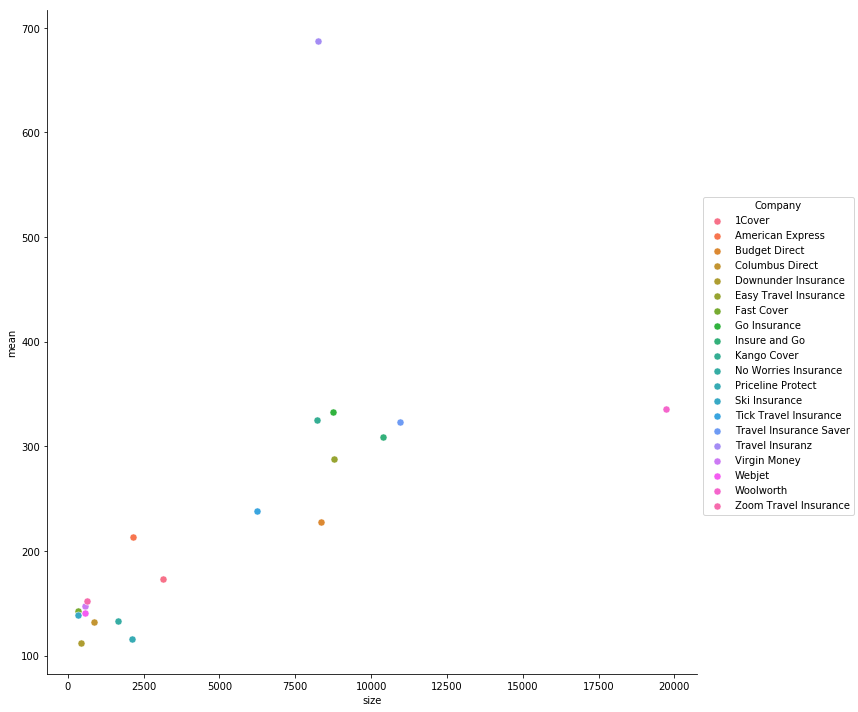

In [59]:
aus_comp = df_aus.groupby('Company').agg({'Price':[np.mean, np.median, np.size]}).reset_index()
aus_comp.columns = ['Company', 'mean', 'median', 'size']
g = sb.FacetGrid(aus_comp, hue="Company", size=10)
g.map(plt.scatter, "size", "mean", s=50, alpha=1, linewidth=.5, edgecolor="white")
g.add_legend()

In [48]:
aus_comp[['mean', 'size']]

,mean,size
0,173.233029,3150.0
1,213.546404,2155.0
2,227.572738,8348.0
3,132.211670,874.0
4,111.911492,449.0
5,287.913356,8760.0
6,142.745723,339.0
7,333.104164,8728.0
8,308.517278,10392.0
9,324.741291,8223.0


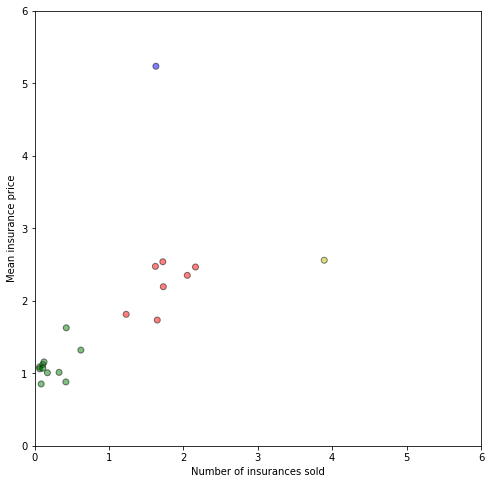

In [121]:
df_cluster = aus_comp[['mean', 'size']]
df_cluster = StandardScaler(with_mean=False).fit_transform(df_cluster)

kmeans = KMeans(n_clusters=4, n_jobs=cores)
kmeans.fit(df_cluster)
labels = kmeans.predict(df_cluster)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))

colmap = {1: 'r', 2: 'g', 3: 'b', 4:'y'}
colors = list(map(lambda x: colmap[x+1], labels))

plt.figure(figsize=(8, 8))
plt.scatter(list(dict(df_cluster).values()), list(dict(df_cluster).keys()), color=colors, alpha=0.5, edgecolor='k')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.ylabel('Mean insurance price')
plt.xlabel('Number of insurances sold')
plt.show()

In resulting distribution we can see four clusters:
* Cheap insurances from companies with low reputation (green)
* Cluster with average reputation and meduim level prices (red)
* Companies with top level of service and high prices (blue)
* Companies with semi-monopolistic position on market (yellow)